In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.datasets import fashion_mnist

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import itertools

%matplotlib inline
%reload_ext nb_black


Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
tf.__version__

'2.1.0'

<IPython.core.display.Javascript object>

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

<IPython.core.display.Javascript object>

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

<IPython.core.display.Javascript object>

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

<IPython.core.display.Javascript object>

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


def to_label(index: int) -> str:

    return class_names[index]

<IPython.core.display.Javascript object>

In [7]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):

    plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Simple NN Model

In [8]:
def create_simple_model() -> keras.models.Model():

    model = keras.Sequential()

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=256, activation="relu"))

    model.add(keras.layers.Dense(units=len(class_names), activation="softmax"))

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return model

<IPython.core.display.Javascript object>

In [9]:
simple_model = create_simple_model()

<IPython.core.display.Javascript object>

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", min_delta=0.01, patience=4, verbose=2
)

<IPython.core.display.Javascript object>

In [11]:
simple_model.fit(
    x_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping]
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 68us/sample - loss: 0.4746 - accuracy: 0.8271 - val_loss: 0.3735 - val_accuracy: 0.8642
Epoch 2/50
54000/54000 [==============================] - 3s 65us/sample - loss: 0.3594 - accuracy: 0.8663 - val_loss: 0.3594 - val_accuracy: 0.8725
Epoch 3/50
54000/54000 [==============================] - 4s 66us/sample - loss: 0.3228 - accuracy: 0.8816 - val_loss: 0.3703 - val_accuracy: 0.8632
Epoch 4/50
54000/54000 [==============================] - 4s 67us/sample - loss: 0.3000 - accuracy: 0.8882 - val_loss: 0.3293 - val_accuracy: 0.8805
Epoch 5/50
54000/54000 [==============================] - 4s 69us/sample - loss: 0.2803 - accuracy: 0.8949 - val_loss: 0.3218 - val_accuracy: 0.8868
Epoch 6/50
54000/54000 [==============================] - 4s 69us/sample - loss: 0.2652 - accuracy: 0.9013 - val_loss: 0.3413 - val_accuracy: 0.8808
Epoch 7/50
54000/54000 [==============================] -

<IPython.core.display.Javascript object>

In [12]:
simple_model.evaluate(x_test, y_test, verbose=0)

[0.35713873847723004, 0.8798]

<IPython.core.display.Javascript object>

## Convolution Model

In [13]:
def create_convolution_model() -> keras.models.Model():

    model = keras.Sequential()

    model.add(
        keras.layers.Conv2D(
            filters=128, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
        )
    )
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=256, activation="relu"))

    model.add(keras.layers.Dense(units=len(class_names), activation="softmax"))

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return model

<IPython.core.display.Javascript object>

In [14]:
conv_model = create_convolution_model()

<IPython.core.display.Javascript object>

In [15]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

<IPython.core.display.Javascript object>

In [16]:
x_conv_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

<IPython.core.display.Javascript object>

In [17]:
conv_model.fit(
    x_conv_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stopping],
    batch_size=128,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 34s 626us/sample - loss: 0.5048 - accuracy: 0.8169 - val_loss: 0.3451 - val_accuracy: 0.8757
Epoch 2/50
54000/54000 [==============================] - 36s 664us/sample - loss: 0.3106 - accuracy: 0.8862 - val_loss: 0.2877 - val_accuracy: 0.8990
Epoch 3/50
54000/54000 [==============================] - 35s 647us/sample - loss: 0.2652 - accuracy: 0.9021 - val_loss: 0.2626 - val_accuracy: 0.9035
Epoch 4/50
54000/54000 [==============================] - 37s 692us/sample - loss: 0.2302 - accuracy: 0.9134 - val_loss: 0.2553 - val_accuracy: 0.9058
Epoch 5/50
54000/54000 [==============================] - 37s 690us/sample - loss: 0.2047 - accuracy: 0.9239 - val_loss: 0.2407 - val_accuracy: 0.9147
Epoch 6/50
54000/54000 [==============================] - 34s 627us/sample - loss: 0.1799 - accuracy: 0.9325 - val_loss: 0.2584 - val_accuracy: 0.9073
Epoch 7/50
54000/54000 [=====================

<IPython.core.display.Javascript object>

In [30]:
x_conv_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

<IPython.core.display.Javascript object>

In [31]:
conv_model.evaluate(x_conv_test, y_test, verbose=0)

[0.28416601256132124, 0.9106]

<IPython.core.display.Javascript object>

In [32]:
y_pred = conv_model.predict_classes(x_conv_test)

<IPython.core.display.Javascript object>

In [33]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.80      0.92      0.85      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.82      0.65      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<IPython.core.display.Javascript object>

In [34]:
matrix = confusion_matrix(y_test, y_pred)

<IPython.core.display.Javascript object>

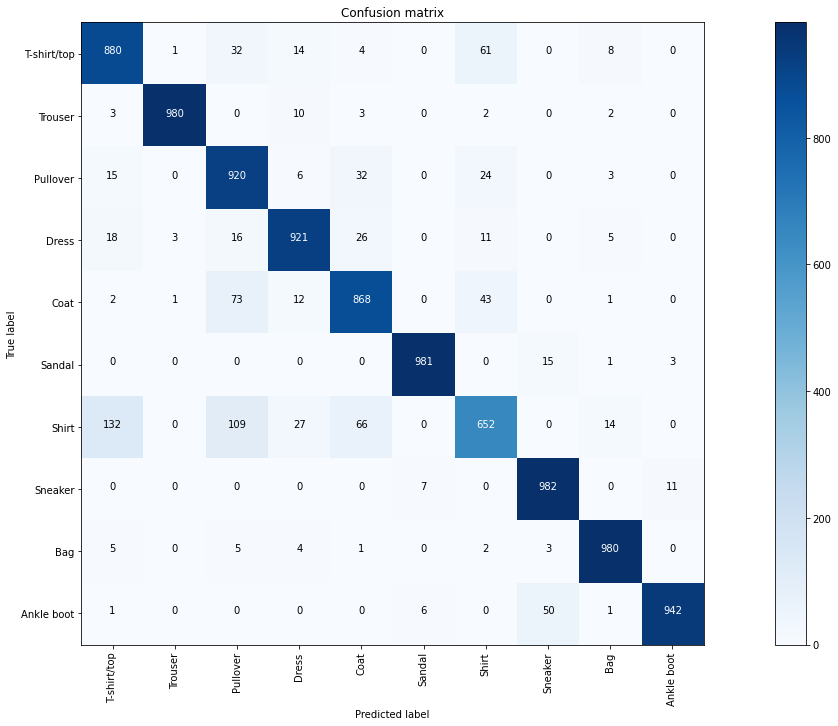

<IPython.core.display.Javascript object>

In [35]:
plot_confusion_matrix(matrix, class_names)

## Visualizing the Convolutions and Pooling

In [41]:
for i, y in enumerate(y_test[:20]):
    print("image", i, ":", y, to_label(y))

image 0 : 9 Ankle boot
image 1 : 2 Pullover
image 2 : 1 Trouser
image 3 : 1 Trouser
image 4 : 6 Shirt
image 5 : 1 Trouser
image 6 : 4 Coat
image 7 : 6 Shirt
image 8 : 5 Sandal
image 9 : 7 Sneaker
image 10 : 4 Coat
image 11 : 5 Sandal
image 12 : 7 Sneaker
image 13 : 3 Dress
image 14 : 4 Coat
image 15 : 1 Trouser
image 16 : 2 Pullover
image 17 : 4 Coat
image 18 : 8 Bag
image 19 : 0 T-shirt/top


<IPython.core.display.Javascript object>

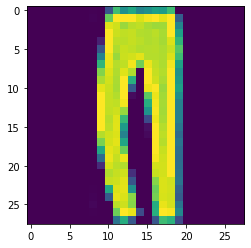

<IPython.core.display.Javascript object>

In [42]:
plt.imshow(x_test[2])
plt.show()

In [43]:
layer_outputs = [layer.output for layer in conv_model.layers]

<IPython.core.display.Javascript object>

In [44]:
activation_model = keras.models.Model(inputs=conv_model.input, outputs=layer_outputs)

<IPython.core.display.Javascript object>

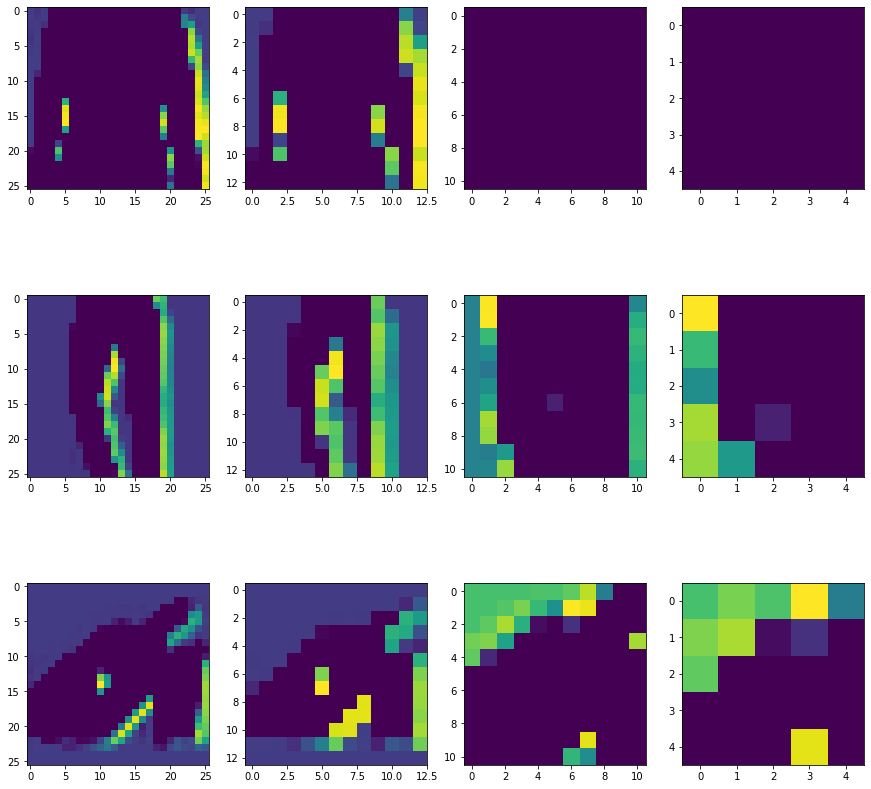

<IPython.core.display.Javascript object>

In [47]:
f, axarr = plt.subplots(3, 4)
f.set_figheight(15)
f.set_figwidth(15)

FIRST_IMAGE = 89
SECOND_IMAGE = 5
THIRD_IMAGE = 658
CONVOLUTION_NUMBER = 5
for x in range(0, 4):
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER])
    axarr[0, x].grid(False)

    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER])
    axarr[1, x].grid(False)

    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER])
    axarr[2, x].grid(False)

plt.show()